**Women ages 25 to 34 earned 93 cents for every dollar a man in the same age group earned on average. In 1980, women ages 25 to 34 earned 33 cents less than their male counterparts, compared with 7 cents in 2020. The estimated 16-cent gender pay gap among all workers in 2020 was down from 36 cents in 1980.**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns
plt.style.use('fivethirtyeight')
from subprocess import check_output
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:

df = pd.read_csv('inc_occ_gender.csv')

In [11]:
df

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na
...,...,...,...,...,...,...,...
553,Pumping station operators,18,Na,17,Na,1,Na
554,Refuse and recyclable material collectors,72,501,66,496,6,Na
555,Mine shuttle car operators,0,Na,0,Na,0,Na
556,"Tank car, truck, and ship loaders",6,Na,6,Na,0,Na


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Occupation   558 non-null    object
 1   All_workers  558 non-null    int64 
 2   All_weekly   558 non-null    object
 3   M_workers    558 non-null    int64 
 4   M_weekly     558 non-null    object
 5   F_workers    558 non-null    int64 
 6   F_weekly     558 non-null    object
dtypes: int64(3), object(4)
memory usage: 30.6+ KB


In [13]:
df.shape

(558, 7)

In [14]:
df.columns

Index(['Occupation', 'All_workers', 'All_weekly', 'M_workers', 'M_weekly',
       'F_workers', 'F_weekly'],
      dtype='object')

In [15]:
df.isnull().sum()

Occupation     0
All_workers    0
All_weekly     0
M_workers      0
M_weekly       0
F_workers      0
F_weekly       0
dtype: int64

In [16]:
df.head(10)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na
5,Advertising and promotions managers,55,1050,29,Na,26,Na
6,Marketing and sales managers,948,1462,570,1603,378,1258
7,Public relations and fundraising managers,59,1557,24,Na,35,Na
8,Administrative services managers,170,1191,96,1451,73,981
9,Computer and information systems managers,636,1728,466,1817,169,1563


In [17]:
df.tail(10)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
548,Industrial truck and tractor operators,579,609,541,612,37,Na
549,Cleaners of vehicles and equipment,222,485,200,498,22,Na
550,"Laborers and freight, stock, and material move...",1433,526,1214,547,219,455
551,Machine feeders and offbearers,30,Na,21,Na,9,Na
552,"Packers and packagers, hand",385,438,158,462,227,424
553,Pumping station operators,18,Na,17,Na,1,Na
554,Refuse and recyclable material collectors,72,501,66,496,6,Na
555,Mine shuttle car operators,0,Na,0,Na,0,Na
556,"Tank car, truck, and ship loaders",6,Na,6,Na,0,Na
557,"Material moving workers, all other",37,Na,32,Na,5,Na


**First let's read the data and add some relevant features such as the wage ratio, gap and share of each genders (or sexes) in the field:**

In [18]:
df = df[~(df.M_weekly == 'Na')]
df = df[~(df.F_weekly == 'Na')]
       
df['M_weekly'] = df.M_weekly.apply(lambda x: int(x))
df['F_weekly'] = df.F_weekly.apply(lambda x: int(x))
df['M_workers'] = df.M_workers.apply(lambda x: int(x))
df['F_workers'] = df.F_workers.apply(lambda x: int(x))
df['All_weekly'] = df.All_weekly.apply(lambda x: int(x))
df['All_workers'] = df.All_workers.apply(lambda x: int(x))
df['M_share'] = df.M_workers/df.All_workers 
df['F_share'] = df.F_workers/df.All_workers 
df['non_weighted_all_weekly'] = (df.M_weekly + df.F_weekly)/2
df['Gap'] = df.M_weekly - df.F_weekly
df['Ratio'] = df.F_weekly/df.M_weekly
df['Ratio_of_workers'] = df.F_workers/df.M_workers

df = df.reset_index(drop = True)

In [19]:
df

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M_share,F_share,non_weighted_all_weekly,Gap,Ratio,Ratio_of_workers
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726,0.556894,0.443106,810.5,169,0.811173,0.795674
1,MANAGEMENT,12480,1351,7332,1486,5147,1139,0.587500,0.412420,1312.5,347,0.766487,0.701991
2,Chief executives,1046,2041,763,2251,283,1836,0.729446,0.270554,2043.5,415,0.815637,0.370904
3,General and operations managers,823,1260,621,1347,202,1002,0.754557,0.245443,1174.5,345,0.743875,0.325282
4,Marketing and sales managers,948,1462,570,1603,378,1258,0.601266,0.398734,1430.5,345,0.784779,0.663158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,TRANSPORTATION,6953,646,5998,679,955,494,0.862649,0.137351,586.5,185,0.727541,0.159220
138,Bus drivers,323,615,184,681,138,572,0.569659,0.427245,626.5,109,0.839941,0.750000
139,Driver/sales workers and truck drivers,2687,747,2582,751,105,632,0.960923,0.039077,691.5,119,0.841545,0.040666
140,"Laborers and freight, stock, and material move...",1433,526,1214,547,219,455,0.847174,0.152826,501.0,92,0.831810,0.180395


**Let's now look at the most unequal and most gender-equal fields (the "most equal" fields are where women make the most, since fields with an opposite and significant gap do not really exist):**

Text(0.5, 0, 'Female/Male wage ratio')

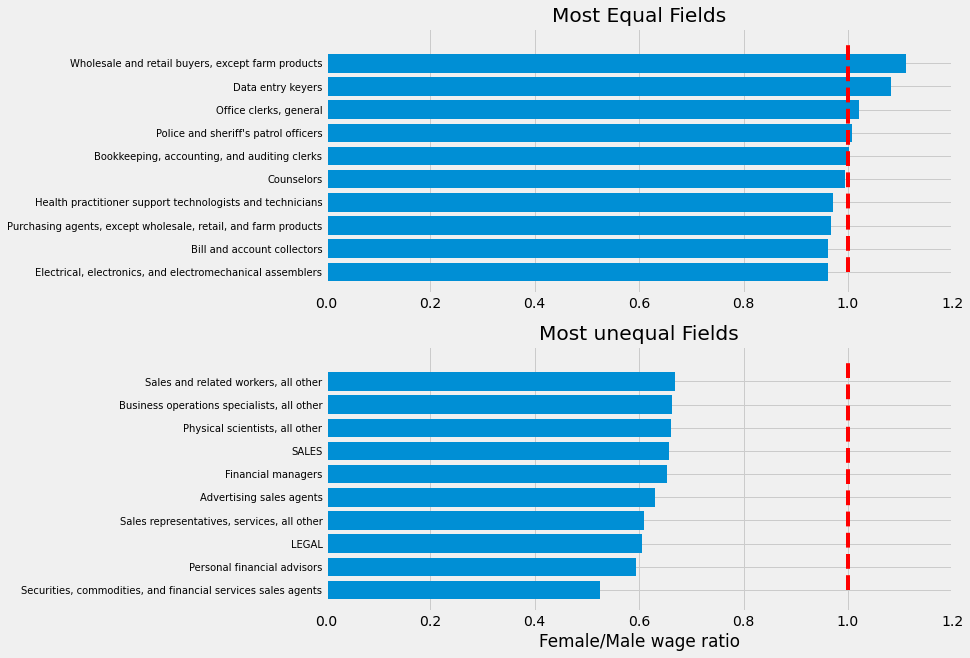

In [22]:
sorted_df = df.sort_values(['Ratio'], ascending = [True])

plt.figure(figsize = (10,10))

plt.subplot(2,1,1)
plt.barh(range(10),sorted_df.tail(10).Ratio)
plt.yticks(range(10),sorted_df.tail(10).Occupation, fontsize = 10)
plt.plot([1,1],[0,10], '--',color = 'r')
plt.title('Most Equal Fields')
plt.xlim([0,1.2])

plt.subplot(2,1,2)
plt.style.use('fivethirtyeight')
plt.barh(range(10),sorted_df.head(10).Ratio)
plt.yticks(range(10),sorted_df.head(10).Occupation, fontsize = 10)
plt.plot([1,1],[0,10], '--',color = 'r')
plt.title('Most unequal Fields')
plt.xlim([0,1.2])
plt.xlabel('Female/Male wage ratio')

**Let's look now at the fields with the largest and smallest share of women:**

(0.0, 1.0)

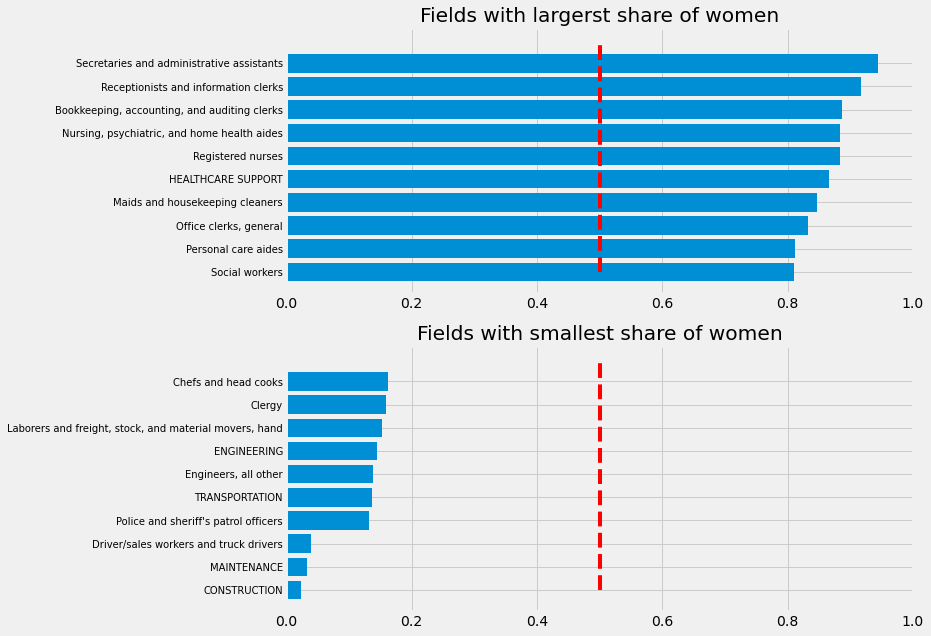

In [23]:
sorted_df = df.sort_values(['F_share'], ascending = [True])

plt.figure(figsize = (10,10))

plt.subplot(2,1,1)
plt.barh(range(10),sorted_df.tail(10).F_share)
plt.yticks(range(10),sorted_df.tail(10).Occupation, fontsize = 10)
plt.plot([0.5,0.5],[0,10], '--',color = 'r')
plt.xlim([0,1])
plt.title('Fields with largerst share of women')

plt.subplot(2,1,2)
plt.style.use('fivethirtyeight')
plt.barh(range(10),sorted_df.head(10).F_share)
plt.yticks(range(10),sorted_df.head(10).Occupation, fontsize = 10)
plt.plot([0.5,0.5],[0,10], '--',color = 'r')
plt.title('Fields with smallest share of women')
plt.xlim([0,1])

**The results are not very surprising.

It is worthwhile to mention that the fields with the smallest share of women aren't by definition those with the highest wages (construction, maintenance, etc.). Which implies that only looking at the gender when analyzing the wage differences would by too simplistic.

So, with that in mind. let's check out the most and least paying fields:**

Text(0.5, 1.0, 'Least paying fields')

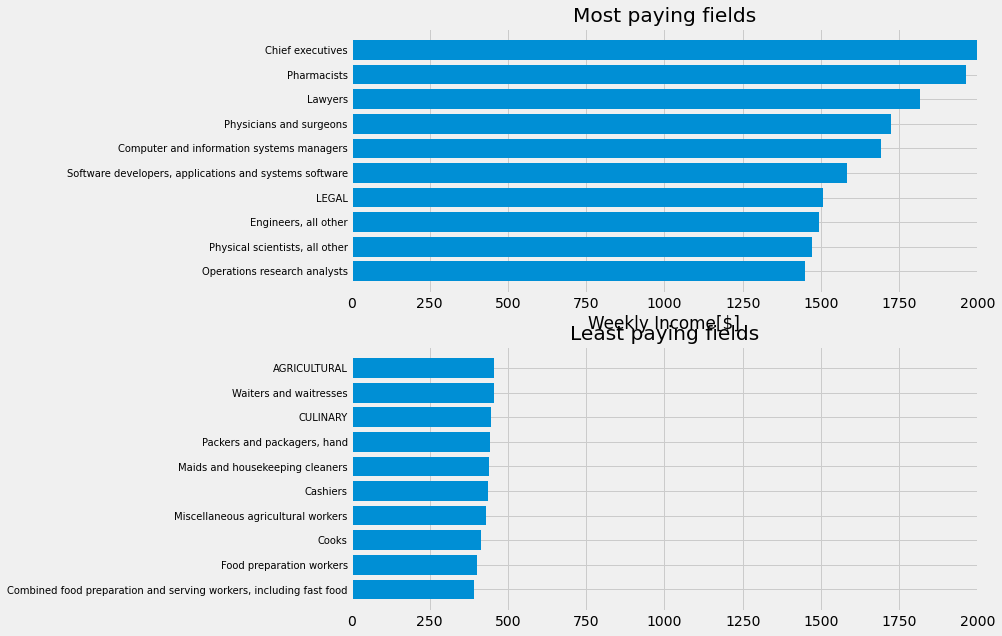

In [24]:
sorted_df = df.sort_values(['non_weighted_all_weekly'], ascending = [True])

plt.figure(figsize = (10,10))

plt.subplot(2,1,1)
plt.barh(range(10),sorted_df.tail(10).non_weighted_all_weekly)
plt.yticks(range(10),sorted_df.tail(10).Occupation, fontsize = 10)
plt.xlim([0,2000])
plt.xlabel('Weekly Income[$]')
plt.title('Most paying fields')

plt.subplot(2,1,2)
plt.style.use('fivethirtyeight')
plt.barh(range(10),sorted_df.head(10).non_weighted_all_weekly)
plt.yticks(range(10),sorted_df.head(10).Occupation, fontsize = 10)
plt.xlim([0,2000])
plt.title('Least paying fields')

* Let's take the most and least paying fields, and check the share of women in each one:*



Text(0.5, 0, 'Shere of Women')

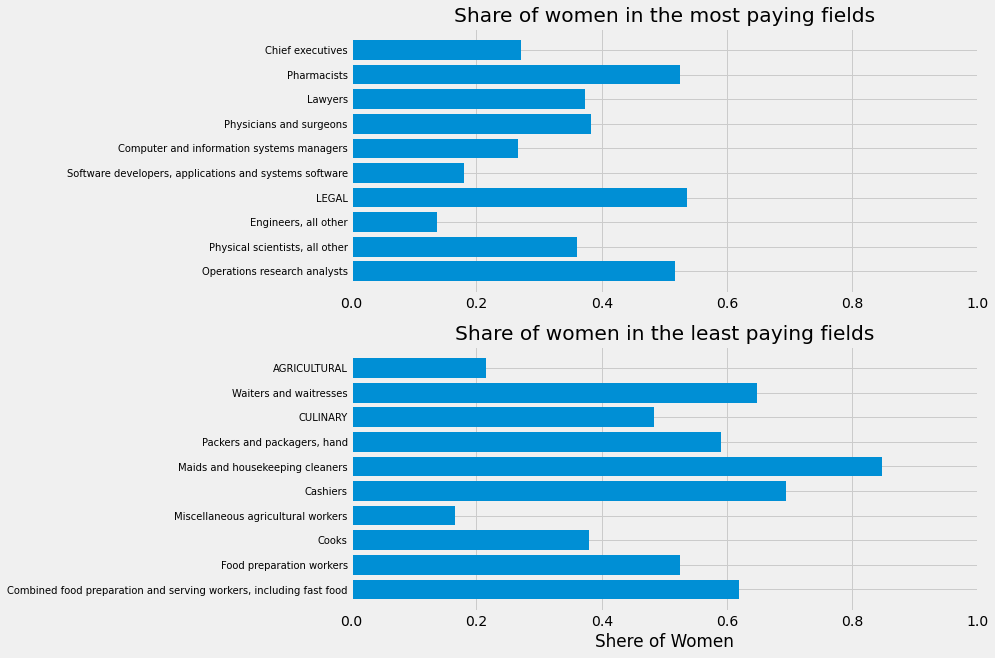

In [25]:
plt.figure(figsize = (10,10))

plt.subplot(2,1,1)
plt.barh(range(10),sorted_df.tail(10).F_share)
plt.yticks(range(10),sorted_df.tail(10).Occupation, fontsize = 10)
plt.xlim([0,1])
plt.title('Share of women in the most paying fields')

plt.subplot(2,1,2)
plt.barh(range(10),sorted_df.head(10).F_share)
plt.yticks(range(10),sorted_df.head(10).Occupation, fontsize = 10)
plt.xlim([0,1])
plt.title('Share of women in the least paying fields')
plt.xlabel('Shere of Women')



Let's see the distribution of the wage gap:

0.8262920118841837

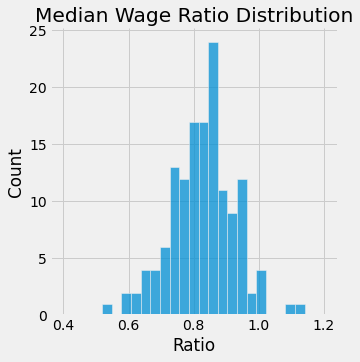

In [26]:
sns.displot(df.Ratio, bins = np.linspace(0.4,1.2,28))
plt.title('Median Wage Ratio Distribution')

np.mean(df.Ratio)

0.8262920118841837

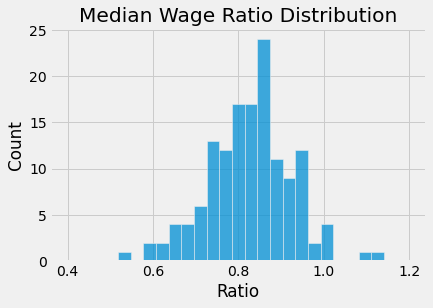

In [27]:
sns.histplot(df.Ratio, bins = np.linspace(0.4,1.2,28))
plt.title('Median Wage Ratio Distribution')

np.mean(df.Ratio)

The average median wage ratio along the different fields is 0.82. We need to be careful and remember that:

People usually use the average wage gap. which is not necessarliy a wiser choice (it is, actually, a worse one) but we need to compare apples with apples.
The number 0.82 is not only an average of medians, it also does not take into account the fact that in different fields there is an extremely different number of employees.
It is interesting, however, that this number if higher (that is - the wage ratio is lower) than what people usually talk about. this might also be, in addition to the caveat above, due to the fact the the data we have automatically controls for the fields, which are the best predictor of the salary, and as we have seen earlier, the gender distribution is not homogeneous - males tend to work at higher-paying fields.

However, it is very clear that there is a clear, and large, wage gap across the board (and market). But in order to get the full picture, we need more features, especially working hours. Typically, when controlling for these too, the wage gap reduces to about 10% (with some noticeable variance around this number).

Let's explore the gap:

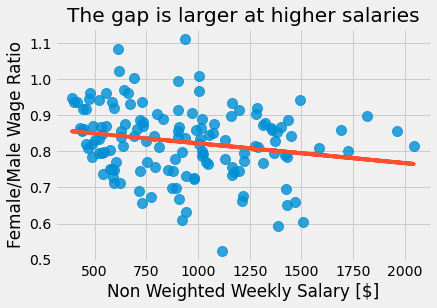

In [28]:
plt.plot(df.non_weighted_all_weekly, df.Ratio,'o',markersize = 10, alpha = 0.8)
plt.xlabel('Non Weighted Weekly Salary [$]')
plt.ylabel('Female/Male Wage Ratio')
plt.title('The gap is larger at higher salaries')

x = df.non_weighted_all_weekly
y = df.Ratio
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,fit_fn(x))

Text(0.5, 1.0, 'The Gap slightly decreases with the share of women')

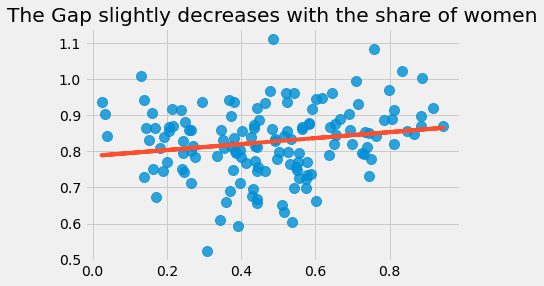

In [29]:
plt.plot(df['F_share'], df.Ratio,'o', markersize = 10, alpha = 0.8)

x = df['F_share']
y = df.Ratio
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,fit_fn(x))
plt.title('The Gap slightly decreases with the share of women')

Regression Model


Let's build a very simple linear regression model in order to understand the importance of the different features.

First, Let's look at the salaries of men and women as a function of the non-normalized field salary

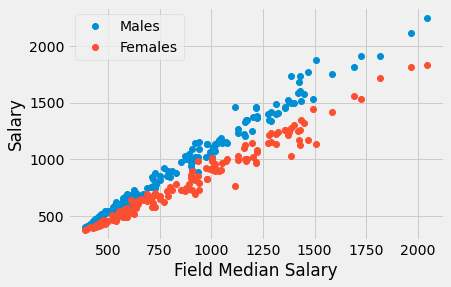

In [30]:
plt.plot(df.non_weighted_all_weekly, df.M_weekly,'o')
plt.plot(df.non_weighted_all_weekly, df.F_weekly,'o')
plt.legend(['Males','Females'])
plt.xlabel('Field Median Salary')
plt.ylabel('Salary')
plt.show()

R^2 on training... 0.9616863219172579
R^2 on test... 0.9621284309458633


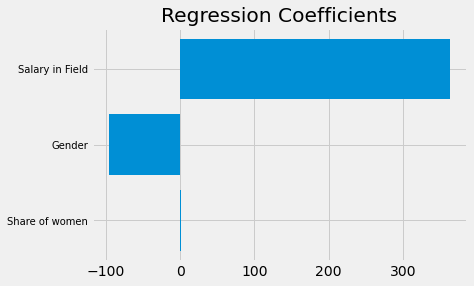

In [31]:
females_df = pd.DataFrame()
males_df = pd.DataFrame()

females_df['Gender'] = np.ones(len(df))
males_df['Gender'] = np.zeros(len(df))

females_df['Salary'] = df.F_weekly
males_df['Salary'] = df.M_weekly

females_df['F_share'] = df.F_share
males_df['F_share'] = df.F_share

females_df['non_weighted_all_weekly'] = df['non_weighted_all_weekly']
males_df['non_weighted_all_weekly'] = df['non_weighted_all_weekly']

regression_df = males_df.append(females_df)

model = LinearRegression()
columns = ['F_share','Gender','non_weighted_all_weekly']
X = regression_df[columns]
X_std = StandardScaler().fit_transform(X)
y = regression_df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

model.fit(X_train,y_train)

plt.barh([0,1,2],model.coef_)
plt.yticks(range(3),['Share of women','Gender','Salary in Field'], fontsize = 10)
plt.title('Regression Coefficients')

print('R^2 on training...',model.score(X_train,y_train))
print('R^2 on test...',model.score(X_test,y_test))

In [32]:
model = LinearRegression()
columns = ['Gender']
X = regression_df[columns]

X_std = StandardScaler().fit_transform(X)
y = regression_df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

model.fit(X_train,y_train)

print('R^2 on training...',model.score(X_train,y_train))
print('R^2 on test...',model.score(X_test,y_test))

R^2 on training... 0.05802824266269824
R^2 on test... 0.05965901840176269
